In [11]:
from astropy.time import Time
from astroplan import download_IERS_A 
import pandas as pd

from astropy.coordinates import EarthLocation
from astroplan import Observer,FixedTarget
import astroplan
from astroplan.plots import plot_airmass,plot_altitude
import astropy.units as u
from astropy.coordinates import SkyCoord
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from datetime import datetime
from pytz import common_timezones
import pyorbital

pd.set_option("display.max_rows", None, "display.max_columns", None)

%matplotlib inline

In [2]:
hydraA=FixedTarget.from_name("Hydra_A")   
#selecting target  - Hydra_A
Ra,Dec=hydraA.ra,hydraA.dec                 #Extracting RA and Dec  since not manually imputed 
print(hydraA,Ra, Dec)   

<FixedTarget "Hydra_A" at SkyCoord (ICRS): (ra, dec) in deg (139.52354583, -12.09555278)> 139d31m24.765s -12d05m43.99s


In [3]:
ctio = Observer.at_site("ctio", timezone = 'America/Santiago')
print(ctio)

kmtnet = Observer.at_site("Siding Spring Observatory", name='KMTNET',timezone = 'Australia/Sydney')
print(kmtnet)


location_meerkat = EarthLocation.from_geodetic(21.44407*u.deg,-30.71369*u.deg,1050*u.m)
meerkat= Observer(location=location_meerkat, name="MeerKaT", timezone='Africa/Johannesburg')
print(meerkat)


location_askap = EarthLocation.from_geodetic(116.637*u.deg,-26.696*u.deg,377.83*u.m)
askap = Observer(location=location_askap, name="ASKAP", timezone='Australia/Perth')
print(askap)

<Observer: name='ctio',
    location (lon, lat, el)=(-70.81500000000001 deg, -30.165277777777778 deg, 2214.9999999993697 m),
    timezone=<DstTzInfo 'America/Santiago' LMT-1 day, 19:17:00 STD>>
<Observer: name='KMTNET',
    location (lon, lat, el)=(149.06119444444445 deg, -31.273361111111104 deg, 1149.0000000015516 m),
    timezone=<DstTzInfo 'Australia/Sydney' LMT+10:05:00 STD>>
<Observer: name='MeerKaT',
    location (lon, lat, el)=(21.44407 deg, -30.71369000000001 deg, 1049.999999999732 m),
    timezone=<DstTzInfo 'Africa/Johannesburg' LMT+1:52:00 STD>>
<Observer: name='ASKAP',
    location (lon, lat, el)=(116.63699999999999 deg, -26.696000000000005 deg, 377.8299999988001 m),
    timezone=<DstTzInfo 'Australia/Perth' LMT+7:43:00 STD>>


In [4]:
#Time Range

start_obs = Time('2020-11-23 00:00:00')
end_obs= Time('2020-11-24 23:00:00')
delta_t = end_obs - start_obs
observe_time = start_obs + delta_t*np.linspace(0, 1,75)

In [5]:
#generate date times
from astropy.coordinates import get_moon

start_obs = Time('2020-11-23 00:00:00')
end_obs= Time('2020-11-24 23:00:00')
delta_t = end_obs - start_obs
observe_timemoon = start_obs + delta_t*np.linspace(0, 1,75)
#bserve_timemoon

#Define the source 
HydraAs = SkyCoord('139d31m24.765s', '-12d05m43.99s', frame='icrs')


#Generate moon positions 
moon_radec=[]
for i in observe_timemoon:
    get_moon(i)
    moon_radec.append(get_moon(i))

    
#convert them to radec format   

radecs=[]
for i in moon_radec:
    c = SkyCoord(ra=i.ra, dec=i.dec)
    radecs.append(c.to_string('hmsdms'))
    
#Splitting them
radec2=[]
for e in radecs:
    radec2.append(e.split(' '))
    
    
#Conveting to degrees
moon_locs=[]
l=np.arange(0,len(radec2))
for i in (l):
    moon_locs.append(SkyCoord(radec2[i][0],radec2[i][1], frame='icrs'))

#Get seperations in degrees

sep=[]
for i in moon_locs:
    sep.append(HydraAs.separation(i).deg)

    
    
#making them numpy arrays
sep=np.array(sep)   

observe_timemoon=np.array(observe_timemoon.datetime)
#print(observe_timemoon)

In [41]:
observe_timemoon2=observe_timemoon.tolist()
print(type(observe_timemoon3))
#observe_timemoon3=np.array(observe_timemoon2)

<class 'numpy.ndarray'>


Text(0, 0.5, 'Seperation')

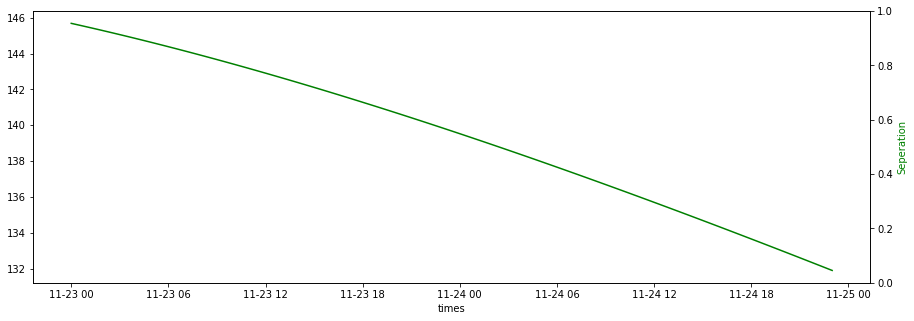

In [57]:
y= np.arange(0, 75)
fig, ax = plt.subplots(figsize=(15,5))

ax1 = ax.twinx()

ax.plot(observe_timemoon, sep, 'g-')


#ax1.plot(observe_timemoon, y, 'b-')

ax.set_xlabel('times')
#ax.set_ylabel('Airmasses', color='b')
ax1.set_ylabel('Seperation', color='g')


In [8]:
time=observe_timemoon

/usr/lib/python3/dist-packages/ipykernel_launcher.py:114: UserWarning: FixedFormatter should only be used together with FixedLocator


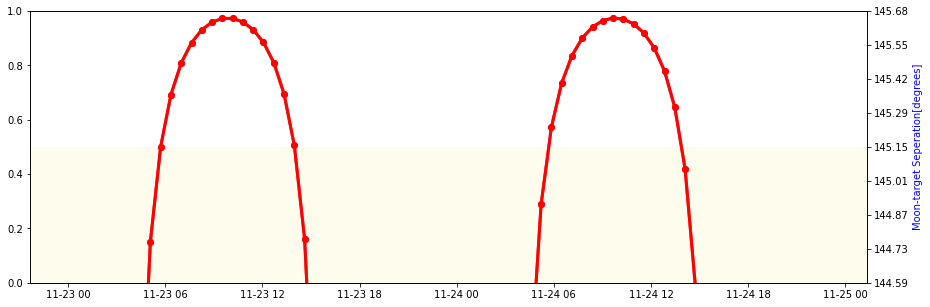

In [62]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

from collections import Sequence
import operator

import matplotlib.pyplot as plt
from matplotlib import dates



#time = Time(time)
#if time.isscalar:
#    time = time + np.linspace(-12, 12, 100)*u.hour
#elif len(time) == 1:
   # warnings.warn('You used a Time array of length 1.  You probably meant '
   #                   'to use a scalar. (Or maybe a list with length > 1?).',
   #                   PlotWarning)
    
    
    
if not isinstance(hydraA, Sequence):
        hydraA = [hydraA]

        
#Setting observatory
observer=ctio

#Getting airmasses and masking them  
for target in hydraA:
        # Calculate airmass
        airmass = observer.altaz(time, hydraA).secz
        # Mask out nonsense airmasses
        masked_airmass = np.ma.array(airmass, mask=airmass < 1)
        
#len(masked_airmass)


# Some checks & info for labels.
        try:
            target_name = hydraA.name
        except AttributeError:
            target_name = ''

            
#Plotting  
fig, ax = plt.subplots(figsize=(15,5))

ax1 = ax.twinx()



#fig, ax= plt.subplots(figsize=(15,6))
            
ax = plt.gca()

#Plotting styles

style_kwargs = {'linestyle': '-', 'color': 'r', 'alpha': 0.9, 'linewidth': 3 }
style_kwargs = dict(style_kwargs)




# Plot data

ax.plot_date(observe_timemoon, masked_airmass, label=target_name,**style_kwargs )


# Format the time axis
#ax.set_xlim([observe_timemoon[0].plot_date, observe_timemoon[-1].plot_date])
#date_formatter = dates.DateFormatter('%H:%M')
#ax.xaxis.set_major_formatter(date_formatter)
#plt.setp(ax.get_xticklabels(), rotation=30, ha='right')


# Invert y-axis and set limits.
y_lim = ax.get_ylim()
if y_lim[1] > y_lim[0]:
    ax.invert_yaxis()
    ax.set_ylim([3, 1])
    
# Draw lo/hi limit regions, if present
ymax, ymin = ax.get_ylim()       # should be (hi_limit, lo_limit)


#Setting min and max
min_region=1.3
max_region=2




#ax.plot_date(observe_timemoon, sep, label='moonseperation' )

ax.axhspan(ymax, max_region, facecolor='#F9EB4E', alpha=0.10)
#if min_region is not None:
  #  ax.axhspan(min_region, ymin, facecolor='#F9EB4E', alpha=0.10)
    
#ax.set_xlabel("Time from {0} [UTC]".format(min(observe_timemoon).datetime.date()))

ax.set_ylabel('Airmasses', color='b')

#if _has_twin(ax):
#altitude_ticks = np.array([90, 60, 50, 40, 30, 20])
seperation_ticks =np.round(sep,2)
#airmass_ticks = 1./np.cos(np.radians(90 - altitude_ticks))


     

#ax2.set_yticks(airmass_ticks)
ax1.plot(observe_timemoon, sep, label='moonseperation' )
ax1.set_yticklabels(seperation_ticks)
ax1.set_ylim(ax.get_ylim())
ax1.set_ylabel('Moon-target Seperation[degrees]',color='b')


ax.plot_date(observe_timemoon, masked_airmass, label=target_name,**style_kwargs )
